## An Analysis of Crime in Chicago Over the Past Year by Elena Márquez

When I was young and my dad was still a grad student at the University of Chicago, my family and I lived in Hyde Park, a neighborhood of the city of Chicago. We did not own a car until my father began attending Uchicago because after dark it became dangerous to walk alone, and all of us from Chicago know that dark begins at 4:30 PM during the winter. Once my dad graduated we soon moved to the NorthShore Suburbs of Chicago. However, I often make the 30 minute drive to Chicago to visit friends, go to restaurants and experience the city. When I went to school in San Diego for a year, a common question I got was "do you feel safe in Chicago." Personally, I have never felt that unsafe walking around Chicago, using public transportation and going out. That being said I am always cautious and make sure I am aware of my surroundings. If possible, I also try not to walk alone. My experience with Chicago is what prompted me to investigate exactly how dangerous is Chicago as it is depicted on the news and is the connotation held with many people.   

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets #newest library 
import pandas as pd 
import geopandas
import contextily as ctx
import ipywidgets
import bqplot

In [130]:
df = pd.read_csv("https://data.cityofchicago.org/resource/ijzp-q8t2.csv")
df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,12553022,JE459794,2021-11-28T23:48:00.000,054XX W MADISON ST,0810,THEFT,OVER $500,ALLEY,False,False,...,29,25,06,1139904.0,1899485.0,2021,2021-12-05T15:48:33.000,41.880287,-87.761753,"\n, \n(41.880287347, -87.761752861)"
1,12553048,JE459783,2021-11-28T23:46:00.000,080XX S DOBSON AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,...,8,44,14,1184620.0,1851910.0,2021,2021-12-05T15:48:33.000,41.748804,-87.599055,"\n, \n(41.748803578, -87.599054513)"
2,12552983,JE459778,2021-11-28T23:43:00.000,078XX S EUCLID AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,False,...,8,43,04A,1190564.0,1853319.0,2021,2021-12-05T15:48:33.000,41.752529,-87.577228,"\n, \n(41.752528738, -87.577228473)"
3,12553041,JE459843,2021-11-28T23:40:00.000,016XX E 74TH PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,8,43,08B,1188530.0,1855912.0,2021,2021-12-05T15:48:33.000,41.759693,-87.584599,"\n, \n(41.759692974, -87.584599413)"
4,12552965,JE459770,2021-11-28T23:33:00.000,064XX S HOYNE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,16,67,15,1163470.0,1861919.0,2021,2021-12-05T15:48:33.000,41.776739,-87.676276,"\n, \n(41.776738843, -87.676275757)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12552945,JE459712,2021-11-27T00:45:00.000,003XX W WEBSTER AVE,1210,DECEPTIVE PRACTICE,THEFT OF LABOR / SERVICES,TAXICAB,False,False,...,43,7,11,1173653.0,1914929.0,2021,2021-12-04T15:47:32.000,41.921983,-87.637370,"\n, \n(41.921982861, -87.637370399)"
996,12551414,JE457968,2021-11-27T00:45:00.000,047XX S LAKE SHORE DR SB,0460,BATTERY,SIMPLE,STREET,False,False,...,4,39,08B,1187183.0,1874321.0,2021,2021-12-04T15:47:32.000,41.810241,-87.588952,"\n, \n(41.8102408, -87.588951979)"
997,12552397,JE457952,2021-11-27T00:39:00.000,024XX E 78TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,7,43,08B,1193980.0,1853727.0,2021,2021-12-04T15:47:32.000,41.753565,-87.564697,"\n, \n(41.753565261, -87.564697147)"
998,12552244,JE457941,2021-11-27T00:30:00.000,079XX S LAFAYETTE AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,...,17,44,04A,1177321.0,1852210.0,2021,2021-12-04T15:47:32.000,41.749795,-87.625791,"\n, \n(41.749794629, -87.625791492)"


In [131]:
df["arrest"].value_counts()

False    879
True     121
Name: arrest, dtype: int64

In [132]:
df["description"].value_counts()

SIMPLE                                                       136
DOMESTIC BATTERY SIMPLE                                      105
OVER $500                                                     66
TO VEHICLE                                                    66
$500 AND UNDER                                                65
                                                            ... 
AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY        1
VIOLATION OF SMOKING BAN                                       1
POSSESSION OF BURGLARY TOOLS                                   1
AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, NO INJURY      1
POSSESS - SYNTHETIC DRUGS                                      1
Name: description, Length: 94, dtype: int64

In [133]:
column_names = ["primary_type", "description", "location_description",
                "arrest",
                "community_area"]

@ipywidgets.interact(field = column_names, bin_num = np.arange(5,20)) 
def make_hist(field, bin_num):
    with plt.style.context("ggplot"):
        fig, ax = plt.subplots(figsize=(10,10))
        if df[field].dtype != "float64" and df[field].dtype != "int64": #if not numerical data
            myseries = df.groupby(field)[field].count()
            x = myseries.index
            y = myseries.values
            ax.bar(x,y)
        else: #if numerical data
            column = field
            df.hist(column, bins=bin_num, ax=ax)
    plt.xlabel(field.capitalize())
    plt.ylabel("Count")
    plt.title("Chicago Crime Over the Past Year")
    fig.autofmt_xdate(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='field', options=('primary_type', 'description', 'location_descript…

With the figure above, one is able to change the field and the nunber of bins of the histogram. The goal of this is so that the reader can see the frequency of what types of crimes have occured in Chicago over the past year, frequency of arrests and what are the most frequent locations in which these crimes occur. According to the data, it looks like battery, theft and criminal damage are the 3 most common types of crime. I wonder if the amount of crimninal damage is correlated to the rise in popularity in looting and rioting over the past year. By a landslide, the most common location for a crime to occur in Chicago is a tavern or liquor store. This does not necesarily surprise me because alcohol lowers people's inhibitions and decision making skills. One of the more alarming discoveries from this histogram is the disproportionate amount of crimes that go without an arrest being made. In this dataset, out of the 1000 crimes recorded, 879 of them did not result in an arrest. 

(Feedback/help I would appreciate here is what line of code can I add so that when the user selects arrest, the x-axis is not numbers and instead one bin has a value of false and the other bin has a value of true)

In [134]:
dfmap = geopandas.read_file("https://data.cityofchicago.org/resource/dfnk-7re6.geojson")
#dfcomm = geopandas.read_file("https://data.cityofchicago.org/resource/igwz-8jzy.geojson")
dfcomm = geopandas.read_file("https://data.cityofchicago.org/resource/y6yq-dbs2.geojson")
dfcomm.head()

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
1,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ..."
2,United Center,UNITED CENTER,32520512.7053,23101.363745,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ..."
4,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ..."


In [135]:
dfmap = dfmap.to_crs(epsg = 3857)
dfcomm = dfcomm.to_crs(epsg = 3857)

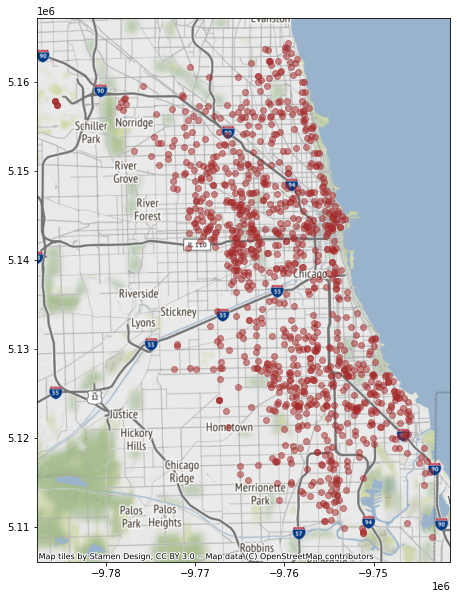

In [136]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
dfmap.plot(ax =ax, color = "brown", alpha = 0.5)
ctx.add_basemap(ax=ax) 
plt.show()

I also wanted to create a map that shows locations of where these crimes are occuring. The data that drives this plot is the GeoJson version of the above tabular data. I was expecting there to be a concentration of red dots in the south side of Chicago. However, it looks like the most dense concentration is north of Chicago along the lake. 

In [137]:
dfmap["_primary_decsription"].unique()

array(['CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'THEFT',
       'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT',
       'ROBBERY', 'CRIMINAL TRESPASS', 'OTHER OFFENSE', 'NARCOTICS',
       'PUBLIC PEACE VIOLATION', 'HOMICIDE', 'STALKING', 'SEX OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION', 'OBSCENITY', 'CONCEALED CARRY LICENSE VIOLATION',
       'KIDNAPPING', 'CRIMINAL SEXUAL ASSAULT', 'ARSON',
       'LIQUOR LAW VIOLATION'], dtype=object)

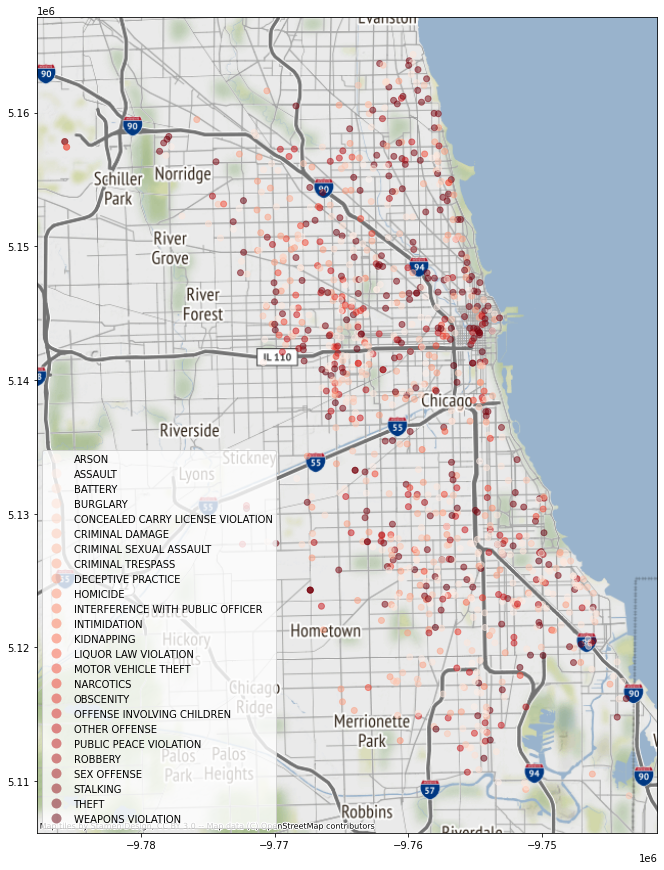

In [138]:
fig, ax = plt.subplots(1,1, figsize = (15,15))

dfmap.plot(ax =ax, column = "_primary_decsription", cmap = "Reds", alpha = .5, categorical=True, legend=True) #color code trails by SURFTYPE

ctx.add_basemap(ax=ax) 
plt.show()

We saw the scatter of the red dots across Chicago, indicating a crime occured in that location. Now, we can see specifically what type of crime occured around Chicago. 

(Feedback I would appreciate here is if there is a better cmap value I can use so that the different types of crimes are more obvious. I know it might be hard because there are so many)

In [139]:
#decorate function with the .interact function 
@ipywidgets.interact(crime = dfmap["_primary_decsription"].unique())
def choose_crime(crime):
    map_subset = dfmap.loc[dfmap["_primary_decsription"] == crime]
    
    #plot with subset
    fig, ax = plt.subplots(1,1, figsize = (15,15))
    map_subset.plot(ax =ax, column = "_primary_decsription", cmap = "RdBu_r", categorical=True, legend=True)
    dfcomm.plot(ax = ax, column = "pri_neigh", cmap = "RdBu_r", alpha = 0.3, edgecolor = "k", categorical=True, legend=True)
    #legend picking documentation: https://matplotlib.org/stable/gallery/event_handling/legend_picking.html 

    ctx.add_basemap(ax=ax) 
    plt.show() 

interactive(children=(Dropdown(description='crime', options=('CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE…

Chicago is made up of various neighborhoods, some better than others. Now we are able to see the neighborhood boundaries and select what kind of crime we want to see plotted on our map to get an idea of what type of crime is more common in which neighborhood. 

Feedback/Help: What would help me make this visualization better is figure out how to move the legend to the center right, outside of the plot so it does not cover any neighborhood boundaries. Also, since there are so many neighborhoods, the color coding does not help all that much. The edgelines help in distinguishing the boundaries, but you can't really tell which neighborhood is which, unless you're very familiar with Chicago and depending on prior knowledge. I think it would be cool if I can select a neighborhood from the legend and that neighborhood will "highlight" itself and the other ones will slightly fade away (I know this can be done with alpha), but I am not sure exactly how to do this bc the matplotlib documentation for this involves matplot 2d lines.  

Crime Data Source: https://data.cityofchicago.org/Public-Safety/Crimes-One-year-prior-to-present/x2n5-8w5q

Maps Crime Data Source: https://data.cityofchicago.org/Public-Safety/Crimes-Map/dfnk-7re6

Community Boundaries Data Source: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

Neighborhood Boundaries Data Source: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Neighborhoods/bbvz-uum9